## Import Packages

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import os 

%matplotlib inline

## Calibrate Camera Using Chessboard Pattern

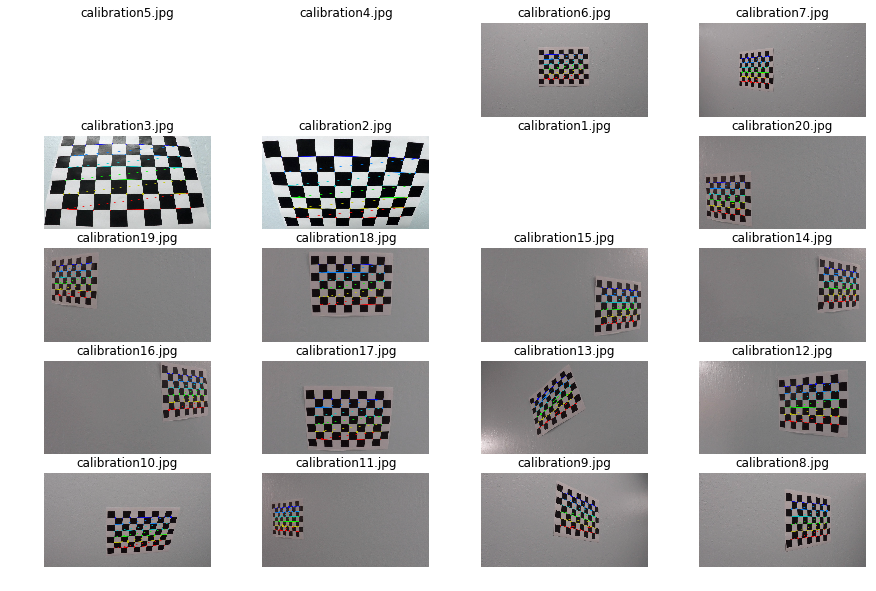

In [3]:
# create lists to store object points and image points from all pattern views 
# (i.e. images where all corners will be found)
## object points: 3D-points in real world coordinates
object_pts_list = [] 
## image points: 2D-points in (virtual) image plane
img_pts_list = [] 

# prepare object points for a given pattern view / image
## each image contains 6*9 corners, i.e. points of contact between two black squares: 9 per row * 6 per column
object_pts = np.zeros((6*9,3), np.float32)
## (0,0,0), (1,0,0), ..., (8,0,0), (0,1,0), (1,1,0), ... with z coordinate always equal to zero
object_pts[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# create list of images to use for camera calibration
img_list = os.listdir('camera_cal/')

# set up subplot grid to show all images with corners drawn on them
fig, axes = plt.subplots(5, 4, figsize=(15, 10))
fig.subplots_adjust(hspace = .2, wspace= .2)
axes = axes.ravel()

# go through list of images
for idx, filename in enumerate(img_list):
    # load images
    img = cv2.imread("camera_cal/" + filename)
    # convert to grayscale
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # identify chessboard corners
    # returns non-zero return value and image points if all 9*6 corners are identified
    pattern_found, corners = cv2.findChessboardCorners(gray_img, (9, 6), flags = 
                                             cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE)    
    # set title and switch of coordinate axes in respective subplot  
    axes[idx].axis('off')
    axes[idx].set_title(filename)
    
    # if all corners were identified in given image
    if pattern_found == True:
        # add object points to list of all object points 
        object_pts_list.append(object_pts)
        # refine image points
        # source: https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html
        refined_corners = cv2.cornerSubPix(gray_img, corners, (11, 11), (-1, -1),
                                           criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1))
        # add image points to list of all image points
        img_pts_list.append(refined_corners)
        # Draw the corners on the original image and display it
        corner_img = cv2.drawChessboardCorners(img, (9, 6), refined_corners, pattern_found)
        axes[idx].imshow(corner_img)

<p><center><em>If an image is not displayed, it means that cv2.findChessboardCorners() could not find all corners in it.</em></center></p>


In [4]:
# Calibrate camera given list of object points and list of image points
ret_val, intrinsics, dist_coeffs, rotation_vecs, translation_vecs = cv2.calibrateCamera(object_pts_list,
                                                                                        img_pts_list, 
                                                                                        img.shape[0:2],
                                                                                        None,
                                                                                        None)

### Undistort example images using intrinsic camera matrix and distortion coefficients

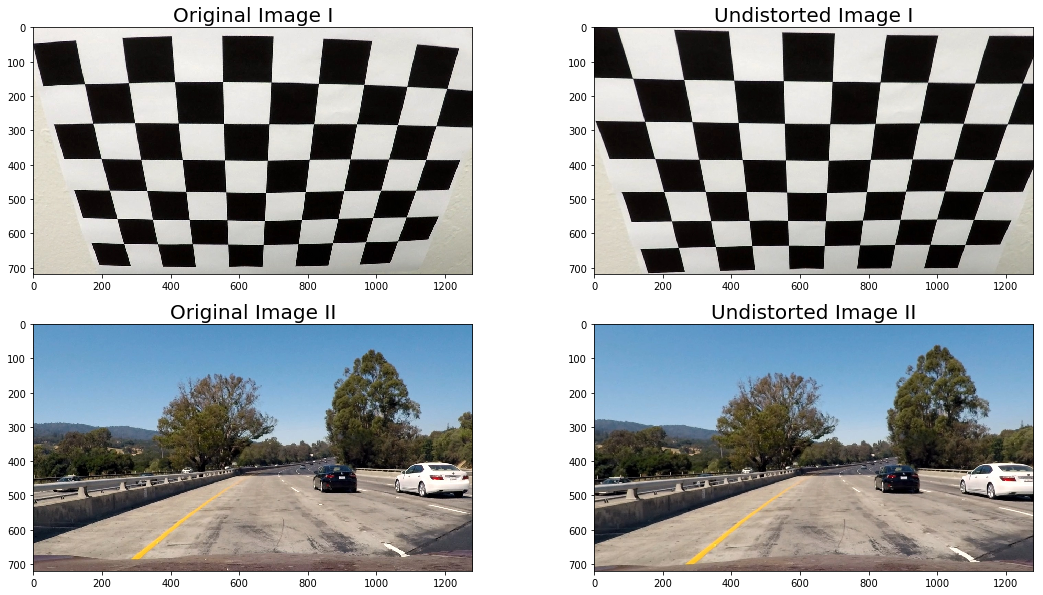

In [24]:
# Load and undistort images 
cb_img = cv2.imread('camera_cal/calibration2.jpg')
cc_img = cv2.imread('test_images/test1.jpg')
cb_img = cv2.cvtColor(cb_img, cv2.COLOR_BGR2RGB)
cc_img = cv2.cvtColor(cc_img, cv2.COLOR_BGR2RGB)
cb_undist_img = cv2.undistort(cb_img, intrinsics, dist_coeffs)
cc_undist_img = cv2.undistort(cc_img, intrinsics, dist_coeffs)

# Visualize undistorted images
fig, axes = plt.subplots(2, 2, figsize=(20,10))
fig.subplots_adjust(hspace = .2, wspace=.01)
axes = axes.ravel()

axes[0].imshow(cb_img)
axes[0].set_title('Original Image I', fontsize=20)
axes[1].imshow(cb_undist_img)
axes[1].set_title('Undistorted Image I', fontsize=20)

axes[2].imshow(cc_img)
axes[2].set_title('Original Image II', fontsize=20)
axes[3].imshow(cc_undist_img)
axes[3].set_title('Undistorted Image II', fontsize=20)